**TO DO:**
* Improve Graphs
* Add generic functions
* Add code descriptions
* Add analysys for the traffic declinse in June

# Finding Weather Indicators that Impact Heavy Traffic on I-94

## Interstate 94


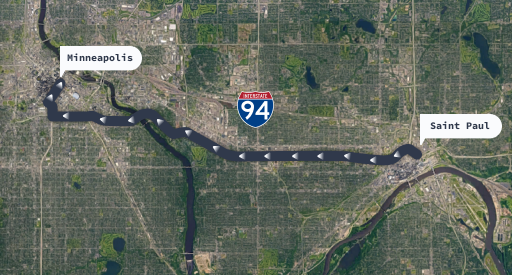

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. Its western terminus is just east of Billings, Montana, at a junction with I-90; its eastern terminus is in Port Huron, Michigan, where it meets with I-69 and crosses the Blue Water Bridge into Sarnia, Ontario, Canada, where the route becomes Ontario Highway 402. It thus lies along the primary overland route from Seattle (via I-90) to Toronto (via Ontario Highway 401), and is the only east–west Interstate highway to have a direct connection to Canada.

## Project goal

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. We will explore the associations between different columns in the dataset and create visualizations for each analysis.

## Dataset Overview

The dataset contains information about traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. The information are limited only to the westbound traffic. You can download the dataset from  [Metro Interstate Traffic Volume Data Set](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)


Columns description in the dataset:

* `holiday`:- US National holidays plus regional holidays
* `temp`:- Average temperature in kelvin
* `rain_1h`:- Amount in millimetres of rain that occurred in the hour
* `snow_1h`:- Amount in millimetres of snow that occurred in the hour
* `clouds_all`:- Percentage of cloud cover
* `weather_main`:- Short textual description of the current weather
* `weather_description`:- Longer textual description of the current weather
* `date_time`:- Time of data collection in local CST time
* `traffic_volume`:- Hourly I-94 ATR 301 reported westbound traffic volume

## Summary of the Analysis


Druing the analysis of the I-94 traffic volume we came to the conclusion that date and time indicatior are more impactful.
There are aprticular hours during the business days and weekends when the amount of cars on the road is sigificant higher.

Let' import libraries which we will use throughout the project

**Import libraries used in the project**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from rich.console import Console
from rich.table import Table

**Funtions used in the project**

## Explore the dataset

In [42]:
metro_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [187]:
# print as a table

def print_in_table(data, table_title, columns=["key", "value"]):
    
    table = Table(title=table_title)
    table.add_column(columns[0], justify="left", style="cyan", no_wrap=True)
    for col in columns[1::]:
        table.add_column(col, justify="left", style="magenta")
    for key, val in data.items():
        table.add_row(key, str(val))
        
    console = Console()
    console.print(table)

    

# create_histogram_plot    
def create_histogram_plot(column, xLabel, title, hist_color, ax):
    
    ax.tick_params(left = False, bottom = False)
    ax.set_title(title, size=20, pad=10)
    ax.set_xlabel(xLabel, fontsize = 16, labelpad = 18)
    ax.set_ylabel("Frequency", fontsize = 16, labelpad = 18)
    
    for ax2, spine in ax.spines.items():
        spine.set_visible(False)

    plt.hist(column, color=hist_color, bins = 15, edgecolor = "white")
    plt.xlim(-100,7500)
    plt.ylim(0,7500)
    plt.xlabel(xLabel)
    plt.ylabel("Frequency")  
    
    
print_in_table(metro_traffic['traffic_volume'].describe(), "Traffic Volume Statstics")    
# create a scatter plot
# create a line
# create a barh

   Traffic Volume Statstics   
┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ key   ┃ value              ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ count │ 48204.0            │
│ mean  │ 3259.8183553232097 │
│ std   │ 1986.8606704463589 │
│ min   │ 0.0                │
│ 25%   │ 1193.0             │
│ 50%   │ 3380.0             │
│ 75%   │ 4933.0             │
│ max   │ 7280.0             │
└───────┴────────────────────┘

In [176]:
type(metro_traffic['traffic_volume'].describe().to_frame())
type(metro_traffic['traffic_volume'].describe().to_frame().iloc[0])
for key, val in (metro_traffic['traffic_volume'].describe()).items():
    print(key,val)

count 48204.0
mean 3259.8183553232097
std 1986.8606704463589
min 0.0
25% 1193.0
50% 3380.0
75% 4933.0
max 7280.0


In [75]:
metro_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [45]:
metro_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [192]:
metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


NoneType

## Traffic Volume Distribution Analysis

Analize the westbound traffic volume reported hourly

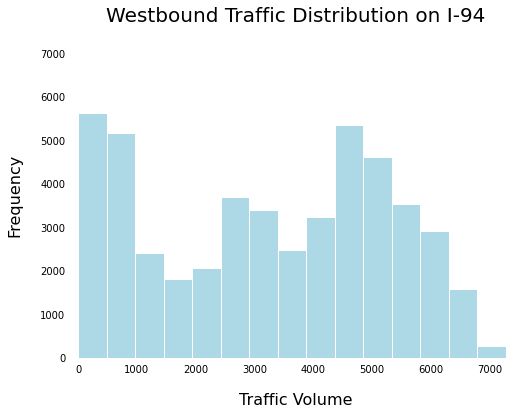

In [47]:
create_histogram_plot(metro_traffic['traffic_volume'], 'Traffic Volume', 'Westbound Traffic Distribution on I-94', '#add8e6', plt.subplots(figsize = (8,6))[1])    

In [48]:
metro_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Observations:**

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 75% of the time, the traffic volume was four times as much (4,933 cars or more). Occurs probably when people finish they job and come back home

## Daytime vs Nighttime traffic

Let's convert `date_time` column to be od type `datetime64` instead of `object`.

In [49]:
metro_traffic['date_time'] = pd.to_datetime(metro_traffic['date_time'])
metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


The data will be divided into two parts:
* `Daytime`: starts from 7 am and end before 7 pm
* `Nighttime`: starts from 7 pm and end before 7 am

In [50]:
metro_traffic['date_time'].dt.hour
day = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour >= 7) & (metro_traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = metro_traffic.copy()[(metro_traffic['date_time'].dt.hour < 7) | (metro_traffic['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


### Compare the traffic volume at night and during day

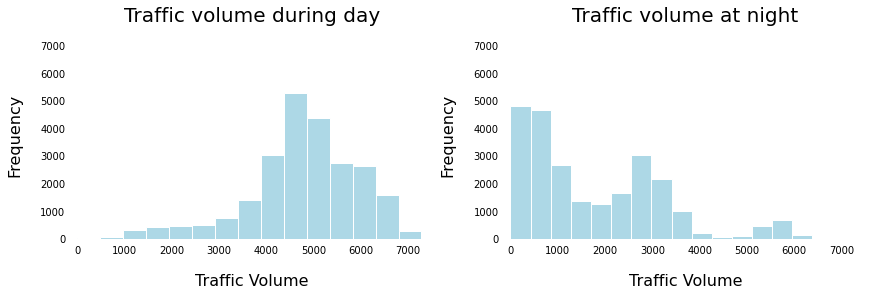

In [70]:
plt.figure(figsize = (12,4), constrained_layout=True)
create_histogram_plot(day['traffic_volume'], 'Traffic Volume', 'Traffic volume during day', '#add8e6', plt.subplot(1, 2, 1))


create_histogram_plot(night['traffic_volume'], 'Traffic Volume', 'Traffic volume at night', '#add8e6', plt.subplot(1, 2, 2))
plt.show()

**Day traffic vlume statistics**

In [52]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Observations:**

* The shape of the histogram is left skewed
* Traffic volume is increasing during a day, the peak is probably when people come back home from the job

**Night traffic vlume statistics**

In [53]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Observations:**

* The shape of the histogram is right skewed
* Traffic volume at night is light, so we can exclude it from our analysis

## Analyze traffic volume by time indicators

We will analyze the traffic volume by three factors:
* Month
* Day of the week
* Time of day

### Analyze traffic volume by month

In [54]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

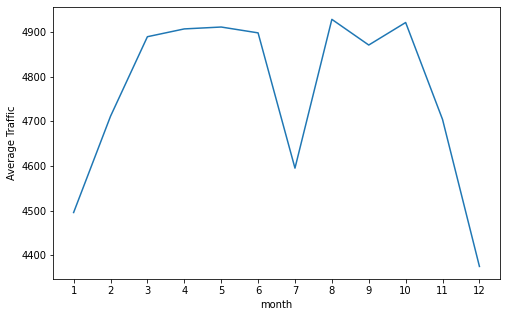

In [55]:
by_month['traffic_volume'].plot(figsize=(8,5))
plt.xticks(range(1,13,1))
plt.ylabel('Average Traffic')
plt.show()

**Observations:**
* Most of the months the average traffic volume stays at the same level
* There is a decrease in traffic during winter (December and January), it could be caused by snowfalls
* There is a decreas in traffic in July, probably a lot of people are on vacations

### Analyze traffic volume by day of the week

Now we can explore the traffic volume by the day of the week. The resulting values will be a range of possible weekdays from monday (0) to Sunday (6)

In [56]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

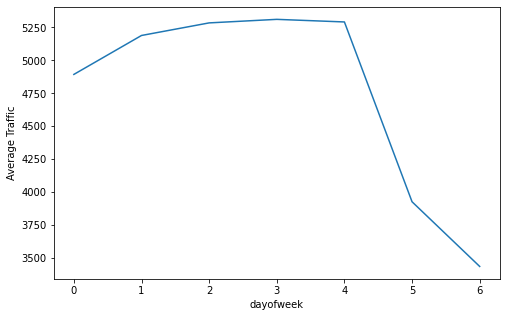

In [57]:
by_dayofweek['traffic_volume'].plot(figsize=(8,5))
plt.xticks(range(0,7,1))
plt.ylabel('Average Traffic')
plt.show()

**Observations:**
* The behavior of traffic volume during each day of the week is rather normal, the volume increase from Monday and decreases on Friday
* The traffic is biger during business
* The traffic is lower during a weekend

### Analyze traffic volume by time of a day

After we finish the analysis in the terms of day of the week, let's focus on time of a day exploration.<br/> We will divide the data in to `business day` and `weekend`.

In [58]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


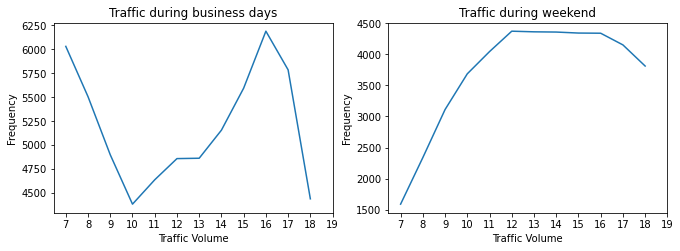

In [59]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xticks(range(7,20,1))
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Traffic during business days")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xticks(range(7,20,1))
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title('Traffic during weekend')

plt.show()

**Observations:**

* During business days traffic valume is hight in the morning when people drive to work and plummet afternoon 
* During business days traffic volume start to raise arount 2 pm and have his peek at 16, it probably cased by the fact that people come back home from the job
* During the weekend traffic volume expand just before afternoon, and stays more or less at the same level till 7 pm

## Time indicators summary:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.


## Weather Indicators

Another possible indicator of heavy traffic is weather. Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

* **Numerical columns**: `temp`, `rain_1h`, `snow_1h` and `clouds_all`.

* **Categorical columns**: `weather_main` and `weather_description`.

### Numerical Indicators

Let's find the strongest correlation between `traffic_volume` and the numerical weather columns.

In [60]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

In [61]:
correlations = {}
correlations["temp"] = day['traffic_volume'].corr(day['temp'])
correlations["rain_1h"] = day['traffic_volume'].corr(day['rain_1h'])
correlations["snow_1h"] = day['traffic_volume'].corr(day['snow_1h'])
correlations["clouds_all"] = day['traffic_volume'].corr(day['clouds_all'])
# correlations["weather_main"] = day['traffic_volume'].corr(day['weather_main'])
# correlations["weather_description"] = day['traffic_volume'].corr(day['weather_description'])

                                                              

table = Table(title="Correlation values between traffic_volume and the numerical weather columns")
table.add_column("Weather indicator", justify="left", style="cyan", no_wrap=True)
table.add_column("Correlation", justify="left", style="magenta")

for key, val in correlations.items():
    table.add_row(key, str(round(val,5)))
    
console = Console()
console.print(table)

    Correlation values between     
 traffic_volume and the numerical  
          weather columns          
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Weather indicator ┃ Correlation ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ temp              │ 0.12832     │
│ rain_1h           │ 0.0037      │
│ snow_1h           │ 0.00127     │
│ clouds_all        │ -0.03293    │
└───────────────────┴─────────────┘

The strongest correlation is with temperature (0.12832), let's examinate this colum.

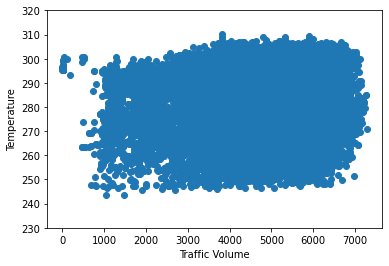

In [62]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(230, 320)
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

**Observations:**

* We can conclude that temperature doesn't look like a solid indicator of heavy traffic.
* Neither of other weather columns seem like reliable indicators for heavy traffic

Let's now look at the other weather-related columns: weather_main and weather_description.

## Categorical Indicators

Let's calculate the average traffic volume ssociated with each unique weather type and `weather_main` column.

In [63]:
by_weather_main = day.groupby('weather_main').mean()
print(by_weather_main)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.812078  0.000000  0.000000    1.670265     4778.416260   
Clouds        282.929274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       284.456433  0.170804  0.000000   84.704417     4837.212911   
Fog           277.579641  0.163840  0.001409   65.477901     4372.491713   
Haze          275.319353  0.040036  0.000000   64.000000     4609.893285   
Mist          279.420825  0.249992  0.000825   74.961435     4623.976475   
Rain          287.089601  3.972943  0.000292   75.870116     4815.568462   
Smoke         292.405833  0.878333  0.000000   53.333333     4564.583333   
Snow          267.984505  0.014017  0.001768   80.501376     4396.321183   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.364678  1.146475  0.000000   75.184035     4648.212860   

           

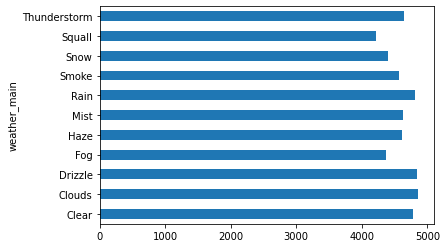

In [64]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

**Observations**

* None of the whether type seems to be a havy traffic indicator
* None of the whether type exceeds traffic volume of 5000 cars
* Thunderstorms, Rain, Drizzle, and Clouds have values the closest to 5000 cars traffic volume

Let's also group by `weather_description`, which has a more granular weather classification.

Let's calculate the average traffic volume ssociated with each unique weather type and `weather_description` column.

In [65]:
by_weather_description = day.groupby('weather_description').mean()
print(by_weather_description)

                                           temp      rain_1h   snow_1h  \
weather_description                                                      
SQUALLS                              296.730000     1.020000  0.000000   
Sky is Clear                         293.232549     0.000000  0.000000   
broken clouds                        282.372927     0.000000  0.000000   
drizzle                              283.573777     0.145072  0.000000   
few clouds                           284.272965     0.000000  0.000000   
fog                                  277.579641     0.163840  0.001409   
freezing rain                        272.860000     0.000000  0.000000   
haze                                 275.319353     0.040036  0.000000   
heavy intensity drizzle              285.467931     0.276207  0.000000   
heavy intensity rain                 290.231781     2.670548  0.000000   
heavy snow                           269.256188     0.002375  0.000000   
light intensity drizzle              2

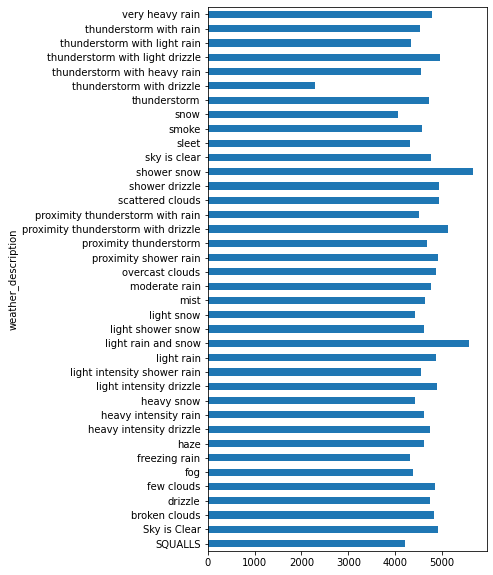

In [66]:
by_weather_description['traffic_volume'].plot.barh()
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()

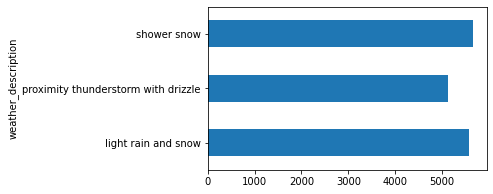

In [67]:
by_weather_description_above_5000 = by_weather_description['traffic_volume'][by_weather_description['traffic_volume'] > 5000]
by_weather_description_above_5000.plot.barh()
by_weather_description_above_5000.plot.barh(figsize=(5, 3))
plt.show()

**Observations:**

The below wheather types exceeds 5000 car volume
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

In my opinion, these indicators exceed 5000 volume because people are more eager to drive a car when there is a shower snow, or light rain, whereas when we have eg. heavy snow they prefer not to go outside at all and stay at home or take public transport to the office.


# Conclusions:

Our goal in this project was to find indicators that have the highest impact on traffic volume. We concluded that time indicators have bigger causality than the weather.

* There is a siginficant decrease in traffic during colder months
* The traffic is biger during business days and it is lower during a weekend
* During business days the biggest traffic volume is between 7 am and 4 pm
* During weekend the peek of traffic volume is between 12 midday and 4 pm
* Temperature has the highest impact on the traffic, but still we cannot treat it like reliable indicators